In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from typing import Union, List
import os

## Constants

In [95]:
M = 1 # kg
x0 = 2.8 # m
v0 = 0 # m/s
dt = 0.01
alpha = 0

## Helper Functions

In [96]:
def V(x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    """
    Custom Potential Energy dependent on position
    """
    return -np.exp(-x**2)-1.2*np.exp(-(x-2)**2)  # J

In [97]:
def derivative(func, x0: float, n: int = 1) -> float:
    """
    Computes derivative of a function f where x=x0, using recurrency
    """
    dx = 1e-6
    if n == 1:
        dy = func(x0+dx) - func(x0)
        return dy/dx
    if n > 1:
        dy = derivative(func, x0 + dx, n-1) - derivative(func, x0, n-1)
        return dy / dx

In [98]:
def create_dir(path: str):
    """
    Creates directory if it doesn't exist already
    """
    if not os.path.exists(path):
        print(f"[INFO]::Creating a directory: {path}")
        os.makedirs(path)
        print(f"[SUCCESS]::directory creation completed!")

In [112]:
class PlotValue:
    def __init__(self, x: np.ndarray, y: np.ndarray, title: str = ""):
        self.x = x
        self.y = y
        self.title = title

In [109]:
class Plotter:
    def __init__(self, x: np.ndarray, v: np.ndarray, t: np.ndarray, dir: str):
        self.x = x
        self.v = v
        self.t = t
        self.dir = dir

    def get_KE(self) -> np.ndarray:
        return 0.5 * M * self.v ** 2

    def get_V(self):
        return V(self.x)

    def get_TE(self):
        return self.get_KE() + self.get_V()

    def plot(self):
        fig, axes = plt.subplots(3, 1, sharex=True)
        values = [
            PlotValue(self.t, self.x, "Position"),
            PlotValue(self.t, self.v, "Velocity"),
            PlotValue(self.t, self.get_KE(), "Kinetic Energy"),
            PlotValue(self.t, self.get_V(), "Potential Energy"),
            PlotValue(self.t, self.get_TE(), "Total Energy"),
        ]
        for ax, v in zip(axes, values):
            ax.plot(v.x, v.y)
            ax.set_ylabel(v.ylabel)
            ax.set_xlabel(v.xlabel)
            ax.set_title(v.title)
        
        fig.tight_layout()
    
        create_dir(self.dir)

        fig.savefig(f"{self.dir}/funcT.png")


In [110]:
class EulerSolver:
    def __init__(self, tmax: int = 100, dt: float = 0.1, alpha: float = 0, mass: float = M):
        num = int(tmax//dt)
        self.x = np.zeros(num)
        self.v = np.zeros(num)
        self.t = np.linspace(0, tmax, num=num)
        self.alpha = alpha
        self.mass = mass
        self.dt = dt

    def get_next_step(self, i: int):
        new_x = self.x[i] + self.v[i] * self.dt
        new_y = self.v[i] - 1 / self.mass * derivative(V, self.x[i]) * self.dt - self.alpha * self.v[i] * self.dt
        return new_x, new_y

    def set_new_values(self, x: float, v: float, i):
        self.x[i] = x
        self.v[i] = v
    
    def calculate(self):
        for i in range(len(self.t)):
            if i == 0:
                self.set_new_values(x0, v0, 0)
                continue
            x, y = self.get_next_step(i-1)
            self.set_new_values(x, y, i)

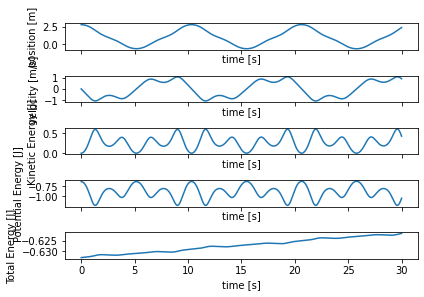

In [111]:
es = EulerSolver(30, 0.001)
es.calculate()
pl = Plotter(es.x, es.v, es.t, "images/ex1")
pl.plot()


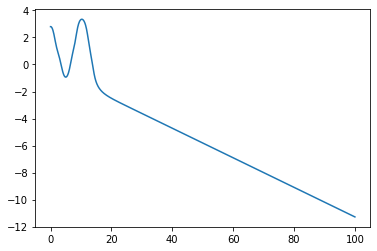

In [ ]:
xdata, vdata, tdata = calculate_euler(100, 0.1)
plt.plot(tdata, xdata)